# Linear Regression

In [19]:
import numpy as np
import matplotlib.pyplot as plt

## Using Matrix inversion

In [47]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print 'Theta:', theta

Theta: [[3.85548055]
 [3.0286187 ]]


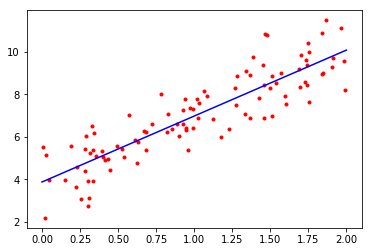

In [40]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_new = X_new_b.dot(theta)
plt.plot(X, y, 'r.')
plt.plot(X_new, y_new, 'b-')

## Using Gradient descent

$$
\nabla_\theta \text{MSE}(\theta) = \frac{2}{m}X^T \cdot (X \cdot \theta - y)
$$
$$
\theta^{i+1} = \theta^i - \eta * \nabla_\theta \text{MSE}(\theta)
$$

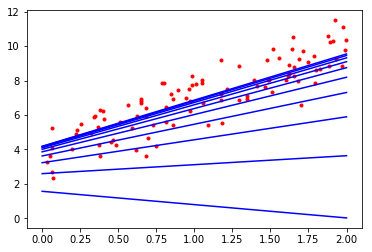

In [65]:
plt.plot(X, y, 'r.')
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

eta = 0.01
n_iterations = 100
m = 100

theta = np.random.randn(2, 1)
for iteration in range(n_iterations):
    gradients = 2./m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
    y_new = X_new_b.dot(theta)
    if iteration % 10 == 0:
        plt.plot(X_new, y_new, 'b-')

## Using stochastic Gradient descent
$$
\frac{d}{d\theta} \text{MSE}(\theta, k) = 2 \cdot X_k^T \cdot (X_k \cdot \theta - y_k)
$$
$$
\theta^{i+1} = \theta^i - \eta * \frac{d}{d\theta} \text{MSE}(\theta, R_{i+1})
$$

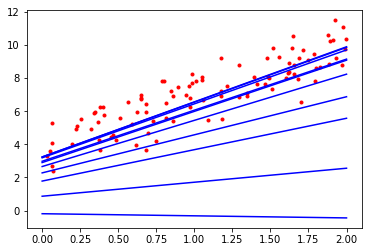

In [69]:
plt.plot(X, y, 'r.')
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

eta = 0.01
n_iterations = 100
m = 100

theta = np.random.randn(2, 1)
for iteration in range(n_iterations):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2.* xi.T.dot(xi.dot(theta) - yi)
    theta = theta - eta * gradients
    
    y_new = X_new_b.dot(theta)
    if iteration % 10 == 0:
        plt.plot(X_new, y_new, 'b-')